## Dimensionality Reduction
### Feature Selection

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [31]:
data = pd.read_csv('wine.csv',header=0)
X = data.iloc[:,1:]
y = data.iloc[:,0]

X.isnull().sum() #X is the dataset(Pandas dataframe).

Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [26]:
X.var() #identifying column variances

Alcohol                             0.659062
Malic acid                          1.248015
Ash                                 0.075265
Alcalinity of ash                  11.152686
Magnesium                         203.989335
Total phenols                       0.391690
Flavanoids                          0.997719
Nonflavanoid phenols                0.015489
Proanthocyanins                     0.327595
Color intensity                     5.374449
Hue                                 0.052245
OD280/OD315 of diluted wines        0.504086
Proline                         99166.717355
dtype: float64

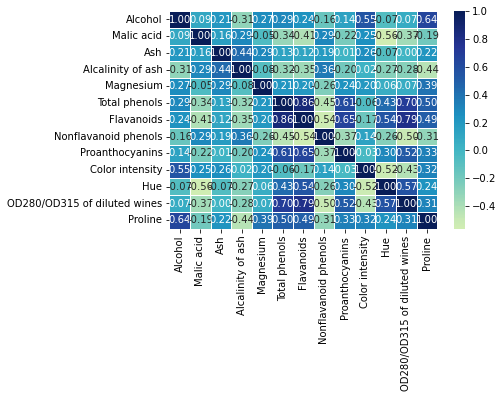

In [55]:
corr = X.corr() #calculating pairwise correlation
sns.heatmap(corr,cmap="YlGnBu", center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

#Check the Flavanoids - OD280/OD315 of diluted wines correlation which is 0.79. is that feature worth removing?

In [25]:
rf = RandomForestClassifier(n_estimators = 30)
rf.fit(X.values,y.values)
f_i = rf.feature_importances_
columns = X.columns
for i in range(len(f_i)):
    print(columns[i] + ' : {:.2f}'.format(f_i[i]))

Alcohol : 0.14
Malic acid : 0.03
Ash : 0.01
Alcalinity of ash : 0.01
Magnesium : 0.02
Total phenols : 0.03
Flavanoids : 0.19
Nonflavanoid phenols : 0.01
Proanthocyanins : 0.02
Color intensity : 0.20
Hue : 0.07
OD280/OD315 of diluted wines : 0.10
Proline : 0.17


In [51]:
X_train,X_test,y_train,y_test = train_test_split(X.values,y.values,stratify = y, test_size = 0.2)
rfe = RFE(estimator=RandomForestClassifier(n_estimators=30), n_features_to_select=6, verbose=1)

# Fits the eliminator to the data
rfe.fit(X_train, y_train)
print('----------------------------------------')
# Print the features and their ranking (high = dropped early on)
print(dict(zip(X.columns, rfe.ranking_)))
print('---------------Support------------------')
# Print the features that are not eliminated
print(X.columns[rfe.support_])
print('---------------Accuracy-----------------')
# Calculates the test set accuracy
acc = accuracy_score(y_test, rfe.predict(X_test))
print("{0:.1%} accuracy on test set.".format(acc)) 

print('---------------Features-----------------')
f_i = rfe.estimator_.feature_importances_
columns = X.columns
for i in range(len(f_i)):
    print(columns[i] + ' : {:.2f}'.format(f_i[i]))

Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
----------------------------------------
{'Alcohol': 1, 'Malic acid': 5, 'Ash': 6, 'Alcalinity of ash': 7, 'Magnesium': 3, 'Total phenols': 2, 'Flavanoids': 1, 'Nonflavanoid phenols': 8, 'Proanthocyanins': 4, 'Color intensity': 1, 'Hue': 1, 'OD280/OD315 of diluted wines': 1, 'Proline': 1}
---------------Support------------------
Index(['Alcohol', 'Flavanoids', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')
---------------Accuracy-----------------
100.0% accuracy on test set.
---------------Features-----------------
Alcohol : 0.10
Malic acid : 0.23
Ash : 0.17
Alcalinity of ash : 0.09
Magnesium : 0.18
Total phenols : 0.23


### Feature Extraction

In [52]:
X.head()

Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0    14.23        1.71  2.43               15.6        127           2.80   
1    13.20        1.78  2.14               11.2        100           2.65   
2    13.16        2.36  2.67               18.6        101           2.80   
3    14.37        1.95  2.50               16.8        113           3.85   
4    13.24        2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280/OD315 of diluted wines  Proline  
0                          3.92     1065  
1                          3.40     1050  
2                          3.17     1185  
3                          3.45     1480  
4                          2.93      735

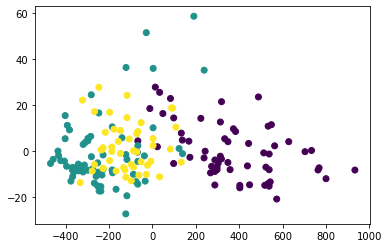

array([99.80912305,  0.17359156])

In [72]:
pca = PCA(n_components = 2) #instanciate a PCA model while indicating the output number of dimensions of the dataset.
X_pca = pca.fit_transform(X)

plt.scatter(x=X_pca[:,0],y=X_pca[:,1],c=y)
plt.show()
pca.explained_variance_ratio_ * 100

## Preprocessing
### Standard Scaling

In [79]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [84]:
print(X_scaled.mean())
print(X_scaled.var())
print(X_scaled[:,0].mean())
print(X_scaled[:,0].var())

-1.2282501914608474e-16
1.0
-8.382807556720283e-16
1.0


### One-Hot/Binary encoding

In [87]:
#new_label = 1 if category=='yes' else 0 #simple condition for changing the vlaues in binary encoding.

In [86]:
one_hot_enc = pd.get_dummies(y)
one_hot_enc

1  2  3
0    1  0  0
1    1  0  0
2    1  0  0
3    1  0  0
4    1  0  0
..  .. .. ..
173  0  0  1
174  0  0  1
175  0  0  1
176  0  0  1
177  0  0  1

[178 rows x 3 columns]

### Feature aggregating